**Máquina de Soporte Vectorial**

**Reconocimiento de género mediante análisis de voz y habla**

La base de datos fue creada para identificar una voz como masculina o femenina, basándose en las propiedades acústicas de la voz y el habla. El conjunto de datos consta de 3.168 muestras de voz grabadas, recogidas de hablantes masculinos y femeninos. Las muestras de voz son pre procesadas por análisis acústico en R utilizando los paquetes seewave y tuneR, con un rango de frecuencia analizado de 0hz-280hz(rango vocal humano).

El conjunto de datos
Las siguientes propiedades acústicas de cada voz se miden e incluyen dentro del CSV:

- meanfreq: frecuencia media (en kHz)
- sd: desviación típica de la frecuencia
- mediana: frecuencia mediana (en kHz)
- Q25: primer cuantil (en kHz)
- Q75: tercer cuantil (en kHz)
- IQR: rango intercuantílico (en kHz)
- sesgo:asimetría (ver nota en la descripción de specprop)
- kurt: curtosis (ver nota en la descripción del specprop)
- sp.ent: entropía espectral
- sfm: planitud espectral
- modo:frecuencia de modo
- centroide: centroide de frecuencia (ver specprop)
- peakf: frecuencia máxima (frecuencia con mayor energía)
- meanfun: media de la frecuencia fundamental medida a través de la señal acústica
- minfun: frecuencia fundamental mínima medida a través de la señal acústica
- maxfun: frecuencia fundamental máxima medida a través de la señal acústica
- media :media de la frecuencia dominante medida a través de la señal acústica
- mindom: mínimo de frecuencia dominante medida a través de la señal acústica
- maxdom: máximo de frecuencia dominante medida a través de la señal acústica
- dfrange: rango de frecuencia dominante medido a través de la señal acústica
- modindx: índice de modulación. Calculado como la diferencia absoluta acumulada entre las mediciones adyacentes de frecuencias fundamentales dividida por el rango de frecuencias
- etiqueta: masculino o femenino

# Importando paquetes y datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = 'https://raw.githubusercontent.com/JIMMYLEOR/Datos/main/voice.csv'

df = pd.read_csv(data, sep=",")

# Explorando la data

In [ ]:
#Observando cantidad de registros y columnas
df.shape

(3168, 21)

In [ ]:
#Primeras 5 filas
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
#Contenido de nombres de columnas
col_names = df.columns

col_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
#Verificando la cantidad de datos nulos por cabecera
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
#Verificando datos perdidos
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
#
print("Total number of labels: {}".format(df.shape[0]))
Cant_hombres = int(df[df.label == 'male'].shape[0] )
Cant_mujeres = int(df[df.label == 'female'].shape[0])
PORChombres = Cant_hombres/int(df.shape[0])
PORCmujeres = Cant_mujeres/int(df.shape[0])
print("Cantidad hombres : " ,Cant_hombres) 
print("% hombres : " ,PORChombres)
print("Cantidad mujeres : " ,Cant_mujeres) 
print("% mujeres : " ,PORCmujeres)

Total number of labels: 3168
Cantidad hombres :  1584
% hombres :  0.5
Cantidad mujeres :  1584
% mujeres :  0.5


In [ ]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


Separando variables predictoras


In [ ]:
X=df.iloc[:, :-1]
X.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [ ]:
X.shape

(3168, 20)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
dtypes: float64(20)
memory usage: 4

Visualizando summary de las variables predictoras

In [ ]:
round(X.describe(),2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00
mean,0.18,0.06,0.19,0.14,0.22,0.08,3.14,36.57,0.90,0.41,0.17,0.18,0.14,0.04,0.26,0.83,0.05,5.05,4.99,0.17
std,0.03,0.02,0.04,0.05,0.02,0.04,4.24,134.93,0.04,0.18,0.08,0.03,0.03,0.02,0.03,0.53,0.06,3.52,3.52,0.12
min,0.04,0.02,0.01,0.00,0.04,0.01,0.14,2.07,0.74,0.04,0.00,0.04,0.06,0.01,0.10,0.01,0.00,0.01,0.00,0.00
25%,0.16,0.04,0.17,0.11,0.21,0.04,1.65,5.67,0.86,0.26,0.12,0.16,0.12,0.02,0.25,0.42,0.01,2.07,2.04,0.10
50%,0.18,0.06,0.19,0.14,0.23,0.09,2.20,8.32,0.90,0.40,0.19,0.18,0.14,0.05,0.27,0.77,0.02,4.99,4.95,0.14
75%,0.20,0.07,0.21,0.18,0.24,0.11,2.93,13.65,0.93,0.53,0.22,0.20,0.17,0.05,0.28,1.18,0.07,7.01,6.99,0.21
max,0.25,0.12,0.26,0.25,0.27,0.25,34.73,1309.61,0.98,0.84,0.28,0.25,0.24,0.20,0.28,2.96,0.46,21.87,21.84,0.93


In [ ]:
# Convertir variable categorica a numerica
# male -> 1
# female -> 0
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


**Escalar datos**
La estandarización se refiere a cambiar la distribución de cada atributo para que tenga una media de cero y una desviación estándar de uno (variación unitaria). Es útil estandarizar los atributos de un modelo. La estandarización de conjuntos de datos es un requisito común para muchos estimadores de aprendizaje automático implementados en scikit-learn; Pueden comportarse mal si las características individuales no se parecen más o menos a datos estándar distribuidos normalmente.

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
a=pd.DataFrame(X).head() 
a.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-2.775233,0.973086,-2.951289,-1.987957,-3.342905,0.414868,2.484850,2.608624,0.407334,1.075269,-1.653744,-2.775233,-1.410240,-1.062575,0.129713,-1.221403,-0.708404,-1.085689,-1.073294,-0.526177
std,1.410724,0.488308,1.616981,0.838180,2.467117,0.610480,3.079490,3.260482,1.179881,0.814843,0.673988,1.410724,0.323567,0.049403,0.401647,0.581143,0.000000,0.679553,0.679768,0.916011
min,-4.049248,0.427355,-4.224901,-2.706986,-5.693607,-0.258485,-0.480911,-0.240099,-1.083730,0.398261,-2.141210,-4.049248,-1.812038,-1.100397,-0.294030,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
25%,-3.841053,0.611669,-4.095851,-2.576102,-5.588987,-0.214778,-0.449858,-0.238940,-0.065236,0.471575,-2.141210,-3.841053,-1.666966,-1.097998,-0.294030,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
50%,-3.463066,0.899998,-3.999293,-2.486885,-3.928699,0.632690,2.293306,1.762946,-0.039083,0.594431,-2.141210,-3.463066,-1.365368,-1.091533,0.260185,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
75%,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,0.909326,4.548056,4.433008,1.516383,1.797340,-1.054576,-1.530640,-1.127233,-1.034015,0.410480,-1.195367,-0.708404,-1.273867,-1.261532,0.289046
max,-0.992157,1.603848,-0.759454,-0.901418,-0.711205,1.005588,6.513656,7.326207,1.708336,2.114740,-0.790514,-0.992157,-1.079594,-0.988934,0.565959,-0.221660,-0.708404,0.124154,0.136933,0.614286


Dividiendo dataset en prueba y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**SVM con paràmetros por dafault**



In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


SVM con kernel lineal default


In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


SVM con kernel Gaussiano

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


Podemos concluir de lo anterior que svm por defecto usa rbf kernel como parámetro para kernel

SVM con kernel polinomial

In [ ]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9589905362776026


El kernel polinomial está funcionando mal. La razón detrás de esto tal vez sea el sobreajuste del conjunto de datos de entrenamiento.


**Implementando validaciòn cruzada lineal**

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]


Podemos ver arriba cómo la puntuación de precisión es diferente cada vez. Esto muestra que la puntuación de precisión depende de cómo se dividieron los conjuntos de datos

In [ ]:
print(scores.mean())

0.9696991175178692




En la validación cruzada de K-fold, generalmente tomamos la media de todas las puntuaciones.

**Implementando validaciòn cruzada gausiana**

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]


In [ ]:
print(scores.mean())

0.9665325639899376


**Implementando validaciòn cruzada polinomial**

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]


In [ ]:
print(scores.mean())

0.9450654873617378


Cuando se realiza la validación cruzada de K-fold, podemos ver una puntuación diferente en cada iteración. Esto sucede porque cuando usamos el método train_test_split, el conjunto de datos se divide de manera aleatoria en conjuntos de datos de prueba y entrenamiento. Por lo tanto, depende de cómo se dividió el conjunto de datos y cuál las muestras son un conjunto de entrenamiento y qué muestras están en el conjunto de prueba.

Con la validación cruzada de K-fold, podemos ver que el conjunto de datos se dividió en 10 partes iguales, cubriendo así todos los datos en el entrenamiento y en el conjunto de pruebas. Esta es la razón por la que obtuvimos 10 puntajes de precisión diferentes.

Tomando todos los valores de C y comprobando la puntuación de precisión con kernel como lineal.
El parámetro C le dice a la optimización de SVM cuánto desea evitar clasificar erróneamente cada ejemplo de entrenamiento. Para valores grandes de C, la optimización elegirá un hiperplano de margen más pequeño si ese hiperplano hace un mejor trabajo al obtener todos los puntos de entrenamiento clasificados correctamente. Por el contrario, un valor muy pequeño de C hará que el optimizador busque un hiperplano de separación de margen más grande, incluso si ese hiperplano clasifica erróneamente más puntos.

Por lo tanto, para valores muy grandes podemos causar un ajuste excesivo del modelo y para un valor muy pequeño de C podemos causar un ajuste insuficiente. Por lo tanto, el valor de C debe elegirse de tal manera que generalice bien los datos invisibles.

In [ ]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


Text(0, 0.5, 'Cross-Validated Accuracy')

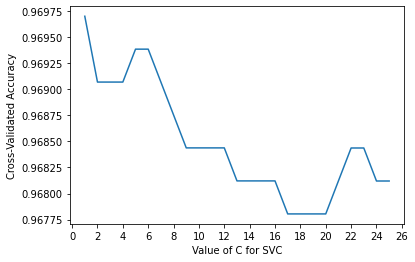

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

En el gráfico anterior podemos ver que la precisión ha estado cerca del 97% para C = 1 y C = 6 y luego cae alrededor del 96,8% y permanece constante.

Veamos con más detalle cuál es el valor exacto de C que nos da una buena puntuación de precisión

In [ ]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969

Text(0, 0.5, 'Cross-Validated Accuracy')

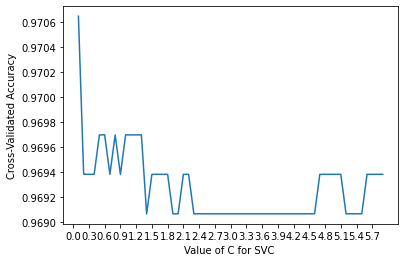

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

La puntuación de precisión es más alta para C = 0,1.

Tomando kernel como rbf y tomando diffAccuracy score es más alto para C = 0.1.

Tomando kernel como rbf y tomando diferentes valores gamma
Técnicamente, el parámetro gamma es el inverso de la desviación estándar del kernel RBF (función gaussiana), que se utiliza como medida de similitud entre dos puntos. Intuitivamente, un valor gamma pequeño define una función gaussiana con una gran varianza. En este caso, dos puntos pueden considerarse similares incluso si están lejos el uno del otro. Por otro lado, un valor gamma grande significa definir una función gaussiana con una varianza pequeña y, en este caso, dos puntos se consideran similares solo si están cerca de los demás valores gamma
Técnicamente, el parámetro gamma es el inverso de la desviación estándar del kernel RBF (función gaussiana), que se utiliza como medida de similitud entre dos puntos. Intuitivamente, un valor gamma pequeño define una función gaussiana con una gran varianza. En este caso, dos puntos pueden considerarse similares incluso si están lejos el uno del otro. Por otro lado, un valor gamma grande significa definir una función gaussiana con una pequeña varianza y, en este caso, dos puntos se consideran similares solo si están cerca uno del otro.

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744, 0.9061883560276325, 0.6016421754582119, 0.49905362776025236]


Text(0, 0.5, 'Cross-Validated Accuracy')

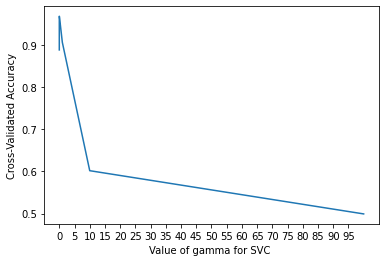

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

Podemos ver que para gamma = 10 y 100 el kernel está funcionando mal. También podemos ver una ligera caída en la puntuación de precisión cuando gamma es 1. Veamos más detalles para el rango de 0.0001 a 0.1.

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744]


Text(0, 0.5, 'Cross-Validated Accuracy')

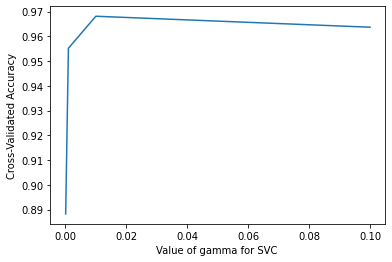

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

La puntuación aumenta de manera constante y alcanza su pico en 0.01 y luego disminuye hasta gamma = 1. Por lo tanto, Gamma debe estar alrededor de 0.01.

Veamos con más detalle los valores gamma.

In [ ]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9681168390368565, 0.9681168390368565, 0.9681148424709501, 0.9671664736652957, 0.9665325639899376]


Text(0, 0.5, 'Cross-Validated Accuracy')

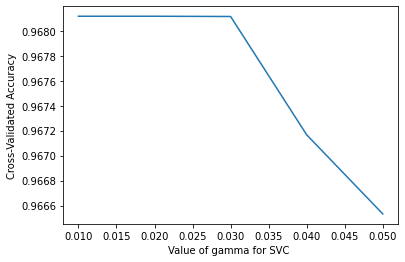

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Podemos ver que hay una disminución constante en la puntuación de precisión a medida que aumenta el valor de gamma. Por lo tanto, gamma = 0.01 es el mejor parámetro.

In [ ]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]


Text(0, 0.5, 'Cross-Validated Accuracy')

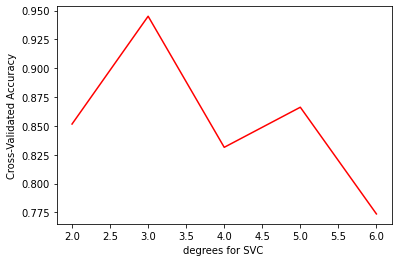

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

El puntaje es alto para el polinomio de tercer grado y luego hay un descenso en el puntaje de precisión a medida que aumenta el grado del polinomio. Por lo tanto, el aumento en el grado del polinomio da como resultado una alta complejidad del modelo y, por lo tanto, provoca un sobreajuste.



**Now performing SVM by taking hyperparameter C=0.1 and kernel as linear
Ahora realiza SVM tomando el hiperparámetro C = 0.1 y el kernel como lineal texto en negrita**

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9747634069400631


**With K-fold cross validation(where K=10)**

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.90851735 0.97160883 0.97476341 0.97791798 0.95899054 0.99053628
 0.99369085 0.97791798 0.95886076 0.99367089]


Tomando la media de todas las puntuaciones

In [ ]:
print(scores.mean())
0.970048164955

0.9706474863235236


0.970048164955

La precisión es levemente buena sin la validación cruzada de K-fold, pero puede fallar en generalizar los datos invisibles. Por lo tanto, es aconsejable realizar una validación cruzada de K-fold donde se cubren todos los datos para que pueda predecir bien los datos no vistos.

**Ahora realizando SVM tomando el hiperparámetro gamma = 0.01 y el kernel como rbf**

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9668769716088328

**Con validación cruzada de K-fold (donde K = 10)**

In [ ]:
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]
0.9696991175178692


Ahora realiza SVM tomando hiperparámetro grado = 3 y kernel como poly

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9589905362776026


Con validación cruzada de K-fold (donde K = 10)

In [ ]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())


[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]
0.9450654873617378


**Realicemos la técnica de búsqueda de cuadrícula para encontrar el mejor parámetro**

In [ ]:
from sklearn.svm import SVC
svm_model= SVC()

In [ ]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']}

In [ ]:
from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9569745728424264


In [ ]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [ ]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9589905362776026
